# An ML project to Predict Customer Churn

#### This project ia an ML classification project that will help a a large telecommunications company predict customer churn.
#### We will be using the CRISP-DM framework for the purposes of this project

### Business Understanding
The main aim for every business is to make profit. This can be done by getting new customers and or by retaining the current customer base. Getting new customers is difficult and mostly expensive.  A company's best option is to retain it's current customer base, satisfied existing customers can also market a company through word of mouth. 

In this project, our aim is to help a large telecommunications company(Vodafone) to be able to predict if a customer will stay or leave their customer base. This will help the company identify customers who are likely to leave and if possible device strategies to change their minds into staying to enjoy the company's products. 


### Hypothesis

#### Null hypothesis :
Tenure does not have more influence on churn than the other features

 
#### Alternative hypothesis:
Tenure influences churn more than the other features

### Analytical questions
 
1.What is the total churn rate?

2.How does tenure affect the churn?

3.How does the type of internet service affect churn?

4.How does the type of contract affect the churn?

5.How does the type of payment method affect the churn?

### Loading datasets

In [2]:
# Importing all necessary libraries
import pyodbc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dotenv import dotenv_values

# Machine learning packages
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE

# Models to be trained
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

In [3]:
# Load environment variables from .env file
environment_variables = dotenv_values('.env')

In [4]:
# Get the values for the credentials set in the '.env' file
server = environment_variables.get("SERVER_NAME")
database = environment_variables.get("DATABASE_NAME")
username = environment_variables.get("USER")
password = environment_variables.get("PASSWORD")

In [5]:
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [6]:
# Use the connect method of the pyodbc library and pass in the connection string.
connection = pyodbc.connect(connection_string)

## Loading 1st training data

In [7]:
# Sql query to retrieve data from the table LP2_Telco_churn_first_3000 from Microsoft SQL database
table_1 = "SELECT * FROM dbo.LP2_Telco_churn_first_3000"
#Execute the SQL queries and load the results into Pandas DataFrames
table_1 = pd.read_sql(table_1, connection)
#Show retrieved table
table_1.head()


C:\Users\user\AppData\Local\Temp\ipykernel_18476\1477551745.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  table_1 = pd.read_sql(table_1, connection)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


## Loading 2nd training data

In [8]:
table_2 = pd.read_csv("Data\LP2_Telco-churn-second-2000.csv")
table_2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


## Loading test data

In [9]:
test = pd.read_excel("Data\Telco-churn-last-2000.xlsx")
test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


## EDA

In [10]:
table_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [11]:
table_1.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [12]:
table_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [13]:
table_2.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [15]:
train = pd.concat([table_1, table_2])
train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.5,No
2039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.9,No
2040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.45,No
2041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.6,Yes


### Observations
 - The 2 training datasets have 21 columns and 3000 and 2043 rows each 
 - The first training dataset has missing values in 9 columns
 - The second training dataset has no missing values
 - The Dataset has 4 numeric columns and 17 categorical columns
 - The target column has 1 missing value
 - The 'TotalCharges' column in both training and testing datasets have data type as 'object' instead of 'float'
 - Some columns have Yes and No and True and False values

## Data Cleaning

In [16]:
# Drop the unnecessary columns
train.drop('customerID', axis=1, inplace=True)

In [17]:
# Function to replace all 'True and False with Yes and No', 'No internet service with No', 'No phone service with No'
def replace_values(table):
    for column in table.columns:
        table[column] = table[column].replace({False: 'No', True: 'Yes'}, regex=True)
        table[column] = table[column].replace('No internet service', 'No', regex = True)
        table[column] = table[column].replace('No phone service', 'No')
    return table

clean_train = replace_values(train)

In [18]:
clean_train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [19]:
clean_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 2042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5043 non-null   object 
 1   SeniorCitizen     5043 non-null   int64  
 2   Partner           5043 non-null   object 
 3   Dependents        5043 non-null   object 
 4   tenure            5043 non-null   int64  
 5   PhoneService      5043 non-null   object 
 6   MultipleLines     4774 non-null   object 
 7   InternetService   5043 non-null   object 
 8   OnlineSecurity    4392 non-null   object 
 9   OnlineBackup      4392 non-null   object 
 10  DeviceProtection  4392 non-null   object 
 11  TechSupport       4392 non-null   object 
 12  StreamingTV       4392 non-null   object 
 13  StreamingMovies   4392 non-null   object 
 14  Contract          5043 non-null   object 
 15  PaperlessBilling  5043 non-null   object 
 16  PaymentMethod     5043 non-null   object 
 17  

In [20]:
#Clean Churn Column to allow for stratification in Splitting to X and y train
clean_train['Churn'].fillna(clean_train['Churn'].mode()[0], inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_18476\1386302689.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clean_train['Churn'].fillna(clean_train['Churn'].mode()[0], inplace=True)


In [21]:
# Fill missing values and Convert Total Charges column to float
clean_train['TotalCharges'] = pd.to_numeric(clean_train['TotalCharges'], errors='coerce')
clean_train['TotalCharges'].fillna(clean_train['MonthlyCharges'], inplace=True)
clean_train['TotalCharges'] = clean_train['TotalCharges'].astype(float) 

C:\Users\user\AppData\Local\Temp\ipykernel_18476\3948745385.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clean_train['TotalCharges'].fillna(clean_train['MonthlyCharges'], inplace=True)


In [22]:
clean_train.to_csv('Data/full_train_data.csv', index=False)

In [23]:
clean_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,None,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,Male,0,No,No,45,No,None,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.500000,No
2039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.900000,No
2040,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.450000,No
2041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.600000,Yes


### Cleaning done so far

- All True values replaced with yes
- All False values replaced with no
- No internet service and No phone service replaced with No
- 1 missing value in Churn column filled with the mode of the column
- Missing values in TotalCharges column filled with values in MonthlyCharges column since tenure values are 0
- Total charges column converted from object to float
Please note: Filling of missing values for the other columns will be done in the pipelines

## Univariate Analysis

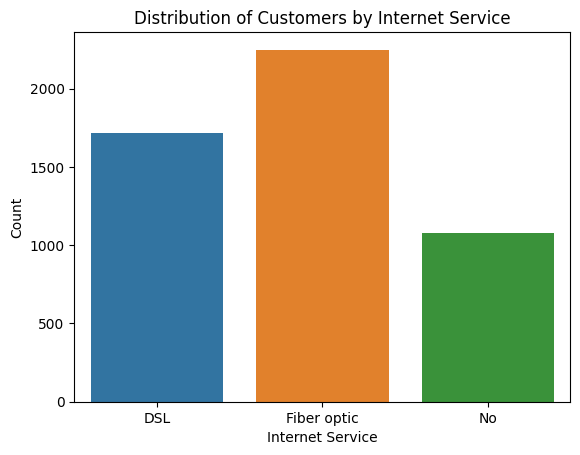

In [24]:
#The distribution of Internet Service
sns.countplot(x='InternetService', data=clean_train, hue='InternetService')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.title('Distribution of Customers by Internet Service')
plt.show()

From the graph, it appears that the majority of people in the dataset have Fiber optic as their internet service type as against DSL. 

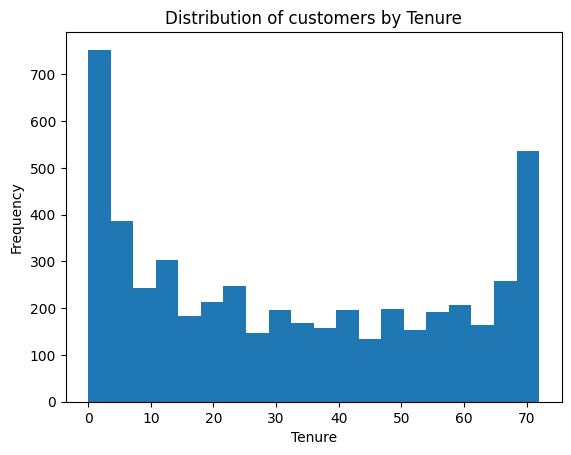

In [25]:
# Histogram for 'Tenure'
plt.hist(clean_train['tenure'], bins=20)
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Distribution of customers by Tenure')
plt.show()

There are more customers who are new and customers with high tenure are also quite high

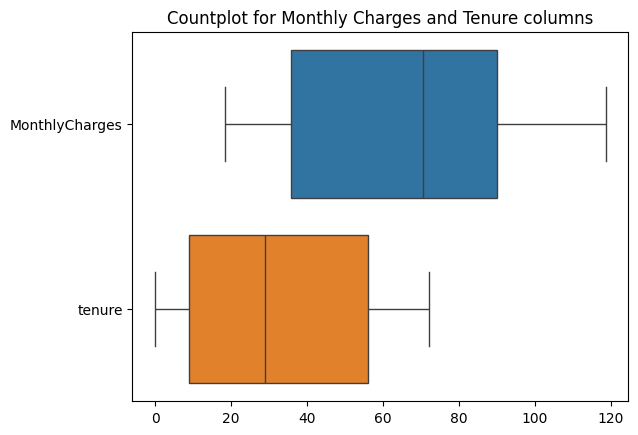

In [26]:
#Countplot to check for outliers in Tenure and Monthly charges
sns.boxplot(data=clean_train[['MonthlyCharges', 'tenure']], orient='h')
plt.title('Countplot for Monthly Charges and Tenure columns')
plt.show()

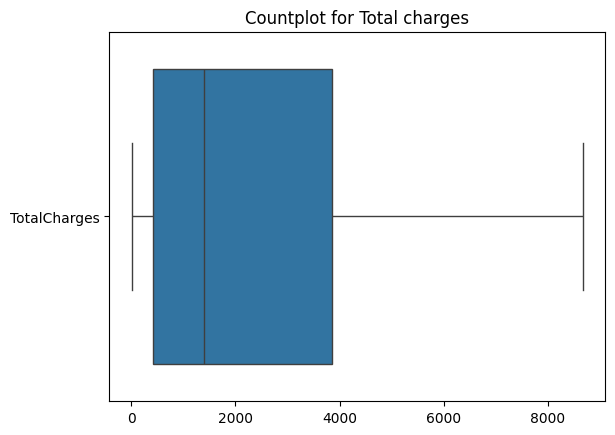

In [27]:
# Countplot to check for Outliers outliers in Total charges column
sns.boxplot(data=clean_train[['TotalCharges']], orient='h')
plt.title('Countplot for Total charges')
plt.show()

There are no outliers in the dataset based on the countplots shown above

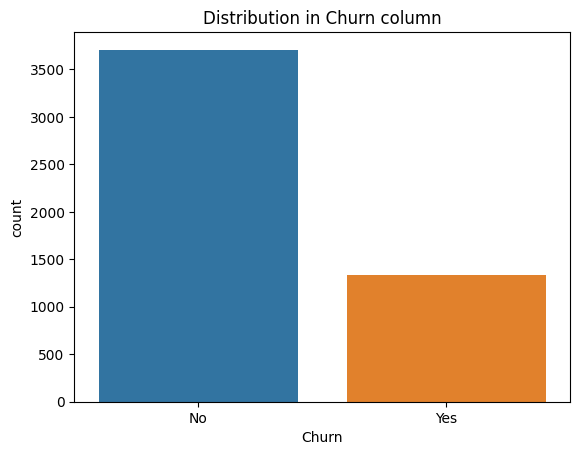

In [28]:
#The distribution in the Churn column
sns.countplot(x='Churn', data=clean_train, hue='Churn')
plt.title('Distribution in Churn column')
plt.show()

Calculating the Churn rate

In [29]:
# Count the number of churned customers
churned_customers = clean_train[clean_train['Churn'] == 'Yes'].shape[0]

# Count the total number of customers
total_customers = clean_train.shape[0]

# Calculate the churn rate
churn_rate = (churned_customers / total_customers) * 100

# Print the churn rate
print("Overall churn rate: {:.2f}%".format(churn_rate))

Overall churn rate: 26.49%


The overall churn rate in the dataset is 26.49%. This means that approximately 26.49% of the customers in the dataset have churned, while the remaining 73.51% have not churned.

### Bar chart showing Distribution of churn

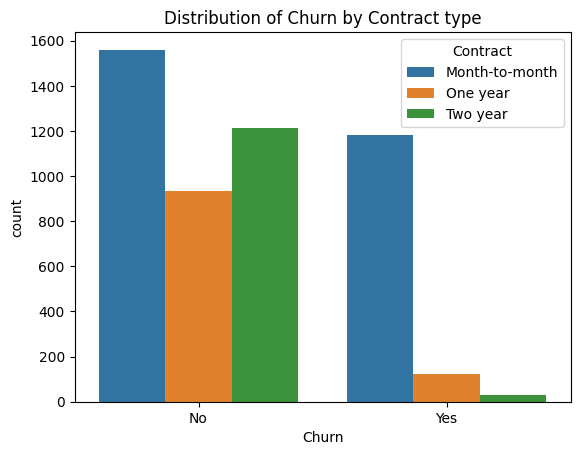

In [30]:
#Churn rate based on the type of contract
sns.countplot(x='Churn', data=clean_train, hue='Contract')
plt.title('Distribution of Churn by Contract type')
plt.show()

Customer on month-to-month churned way higher than the other contract terms.

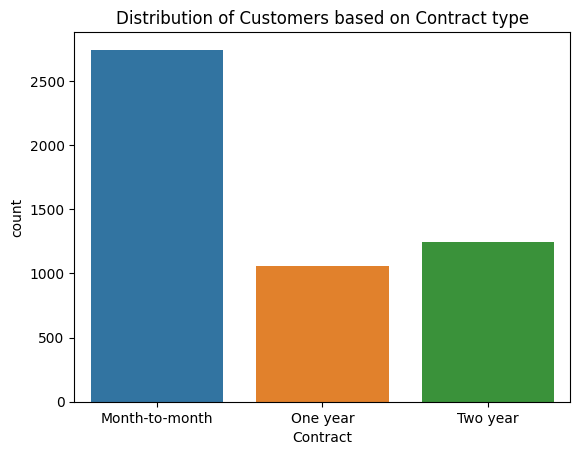

In [50]:
#Distribution of customers based on contract
sns.countplot(x='Contract', data=clean_train, hue='Contract')
plt.title('Distribution of Customers based on Contract type')
plt.show()

There are more month-to-month customers than long term customers

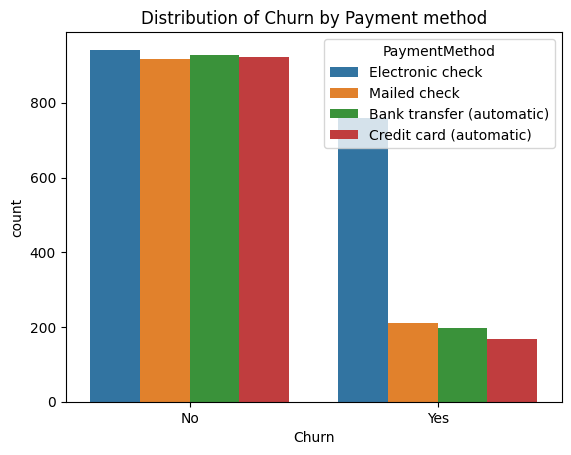

In [32]:
#Churn report based on the payment method used
sns.countplot(x='Churn', hue='PaymentMethod', data=clean_train)
plt.title('Distribution of Churn by Payment method')
plt.show()

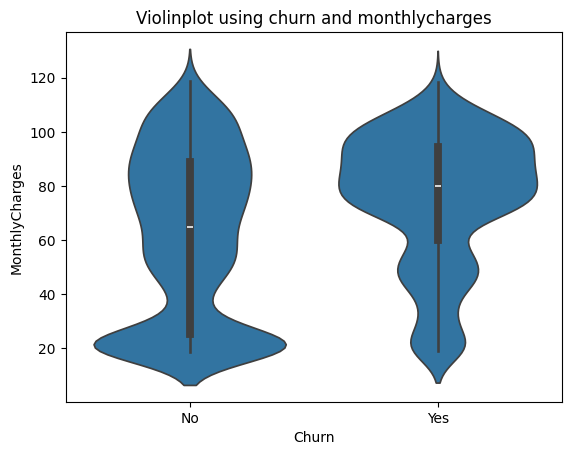

In [33]:
# Violin plot for Churn based on Monthly charges
sns.violinplot(data=clean_train,x='Churn',y='MonthlyCharges')
plt.title('Violinplot using churn and monthlycharges',fontsize=12)
plt.show()

- Customers with relatively higher monthly charges churned more whiles customers with lower monthly charges churned way less
- Customers with lower monthly charges are more likely to stay

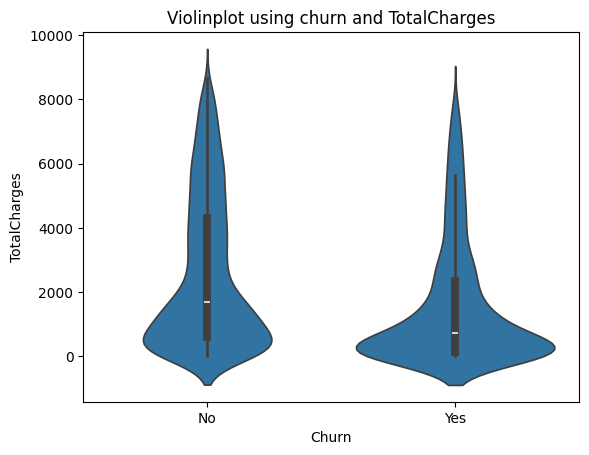

In [51]:
# Violin plot for Churn based on Total charges
sns.violinplot(data=clean_train,x='Churn',y='TotalCharges')
plt.title('Violinplot using churn and TotalCharges')
plt.show()

- Customers with high monthly charges stayed as compared to customers with relatively lower Total charges.

# Data preparation

In [35]:
#Check for balance of the data
df_balance = clean_train['Churn'].value_counts().rename('Total').reset_index()
df_balance


,Churn,Total
0,No,3707
1,Yes,1336


In [36]:
df_balance['Percentage'] = round((df_balance['Total'] / df_balance['Total'].sum()) * 100, 2)
df_balance

,Churn,Total,Percentage
0,No,3707,73.51
1,Yes,1336,26.49


- There is a high skewness in the data set. No values are at 73.5% as against 26.5% for the Yes values. We will have to balance our dataset to give the model enough Yes outcomes to learn from. 

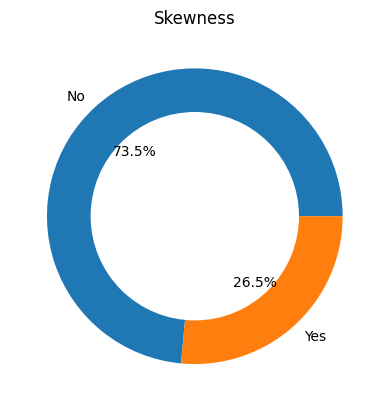

In [37]:
percentage_values = df_balance['Percentage']

# Create the pie chart
plt.pie(percentage_values, labels=df_balance['Churn'], autopct='%1.1f%%', )

# Create a white circle in the middle to create the donut effect
centre_circle = plt.Circle((0, 0), 0.7, color='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Skewness')  # Optional: Set the title

plt.show()

## Split Data into Training and Evaluation sets

In [38]:
# Assign the dataset to X and y variables. y being the target variable and X being the features (input)
X = clean_train.drop('Churn', axis=1)
y = clean_train['Churn']

In [39]:
#Split X and y dataset into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40, stratify=y)

In [40]:
# Use label encoder to encode the target variables into 1(Yes) and 0(No)
encoder = LabelEncoder()

#Fit transforn the y train (Fit_transform instructs the model to learn and transform)
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

## Prepare Pipelines

In [41]:
# Divide dataset into categorical and Numeric columns to aid in processing in the pipelines

# Assign categorical columns by data type
cat_col = X.select_dtypes('object').columns
cat_col

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [42]:
# Assign numeric columns by data type
num_col = X.select_dtypes('number').columns
num_col

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [43]:
# Numerical pipeline to work on numeric columns
num_pipeline = Pipeline(steps=[
    ('num_scaler', StandardScaler()), #Standard scaler is used because there are no outliers in our dataset
])

cat_pipeline = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')), # Simple imputer will impute missing values with the modes of the corresponding columns
    ('cat_encoder', OneHotEncoder()),
])

#Preprocessor uses the the num and pipelines as its steps
preprocessor = ColumnTransformer(transformers=[
    ('num_pipeline', num_pipeline, num_col),
    ('cat_pipeline', cat_pipeline, cat_col)
])

## Training models with the unbalanced dataset

In [44]:
# Create a list of models (Top 8 selected based on ChatGPT recommendation)
models = [
    ('Logistic_regression', LogisticRegression(random_state=42)),
    ('Decision_tree', DecisionTreeClassifier(random_state=42)),
    ('Random_forest', RandomForestClassifier(random_state=42)),
    ('Support_vector', SVC(random_state=42)),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('Gradient_boost', GradientBoostingClassifier(random_state=42)),
    ('Naive_bayes', GaussianNB()),
    ('XGBoost', xgb.XGBClassifier(random_state=42))
]

In [45]:
# Create a dictionary to store all pipelines
all_pipelines = {}

# Create Dictionary to store all confusion matrix
all_confusion_matrix = {}

metrics_table = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1_score'])

# Create final pipeline preprocessor and classifier
for model_name, classifier in models:
    final_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('feature_selection', SelectKBest(mutual_info_classif, k='all')), # Helps to select the best features 
        ('classifier', classifier)
    ])

    # Fit data to pipeline
    final_pipeline.fit(X_train, y_train_encoded)

    # Store the pipeline in the dictionary
    all_pipelines[model_name] = final_pipeline

    y_pred = final_pipeline.predict(X_test)

    #Generate classification report for all pipelines
    metrics = classification_report(y_test_encoded, y_pred, output_dict=True)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test_encoded, y_pred)

    # Add confusion matrix to all pipelines
    all_confusion_matrix[model_name] = conf_matrix

    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1_score = metrics['weighted avg']['f1-score']

    metrics_table.loc[len(metrics_table)] = [model_name, accuracy, precision, recall, f1_score]

#Display metrics for all model in Descending order
metrics_table.sort_values(by='f1_score', ascending=False)

,model_name,accuracy,precision,recall,f1_score
0,Logistic_regression,0.805684,0.798668,0.805684,0.800973
3,Support_vector,0.803040,0.791548,0.803040,0.791524
5,Gradient_boost,0.798414,0.788337,0.798414,0.790632
2,Random_forest,0.781890,0.768738,0.781890,0.771574
7,XGBoost,0.773298,0.764083,0.773298,0.767458
4,KNN,0.754792,0.753053,0.754792,0.753894
1,Decision_tree,0.731659,0.733816,0.731659,0.732705
6,Naive_bayes,0.680767,0.797862,0.680767,0.699293


## Visualisation to show feature importance

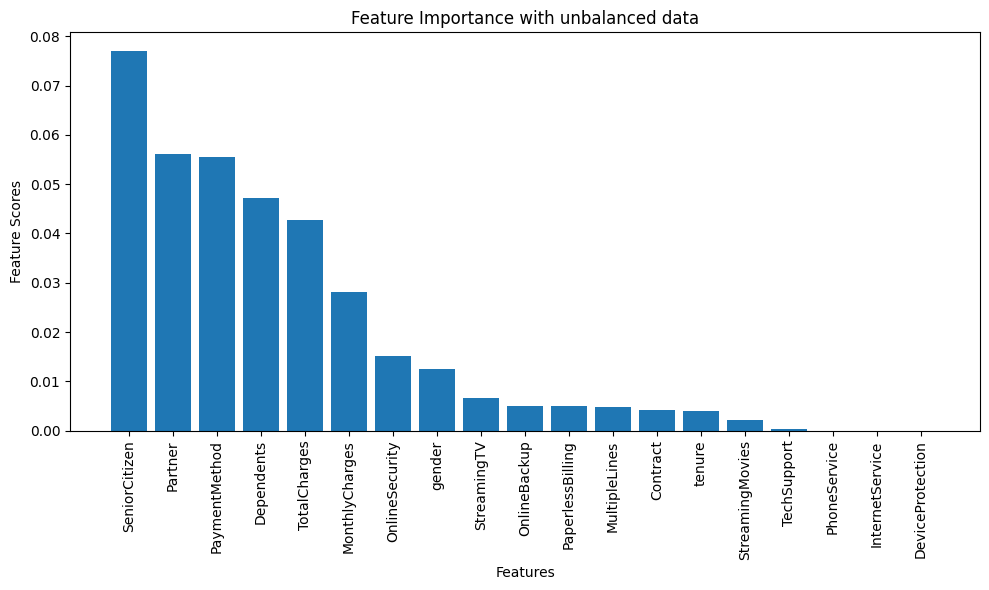

In [52]:
# Access the SelectKBest transformer from the pipeline
select_k_best = all_pipelines[model_name]['feature_selection']

# Get the feature scores from SelectKBest
feature_scores = select_k_best.scores_

# Get the names of all features
all_feature_names = X_train.columns

# Create a dictionary to store feature scores and names
feature_importance = dict(zip(all_feature_names, feature_scores))

# Sort the dictionary by feature scores in descending order
sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Get the feature names and scores separately
sorted_feature_names, sorted_scores = zip(*sorted_feature_importance)

# Create the histogram
plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_scores)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Scores')
plt.title('Feature Importance with unbalanced data')
plt.tight_layout()
plt.show()

## Training Models with a balanced dataset using SMOTE

In [47]:
# Create a dictionary to store all pipelines
all_smote_pipelines = {}

smote_metrics_table = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1_score'])

# Create final pipeline preprocessor and classifier
for model_name, classifier in models:
    smote_pipeline = imbpipeline([
        ('preprocessor', preprocessor), 
        ('smote_sampler', SMOTE(random_state=42)),
        ('feature_selection', SelectKBest(mutual_info_classif, k='all')),
        ('classifier', classifier)
    ])

    # Fit data to pipeline
    smote_pipeline.fit(X_train, y_train_encoded)

    # Store the pipeline in the dictionary
    all_smote_pipelines[model_name] = smote_pipeline

    y_pred = smote_pipeline.predict(X_test)

    #Generate classification report for all pipelines
    smote_metrics = classification_report(y_test_encoded, y_pred, output_dict=True)

    accuracy = smote_metrics['accuracy']
    precision = smote_metrics['weighted avg']['precision']
    recall = smote_metrics['weighted avg']['recall']
    f1_score = smote_metrics['weighted avg']['f1-score']

    smote_metrics_table.loc[len(smote_metrics_table)] = [model_name, accuracy, precision, recall, f1_score]

#Display metrics for all model in Descending order
smote_metrics_table.sort_values(by='f1_score', ascending=False)

,model_name,accuracy,precision,recall,f1_score
5,Gradient_boost,0.797753,0.804460,0.797753,0.800570
2,Random_forest,0.780568,0.774145,0.780568,0.776747
7,XGBoost,0.777925,0.773239,0.777925,0.775288
0,Logistic_regression,0.754792,0.802377,0.754792,0.766856
3,Support_vector,0.748182,0.783209,0.748182,0.758774
1,Decision_tree,0.723067,0.737628,0.723067,0.729115
6,Naive_bayes,0.703239,0.800820,0.703239,0.720634
4,KNN,0.685393,0.753852,0.685393,0.702702


## Visualisation to show feature importance

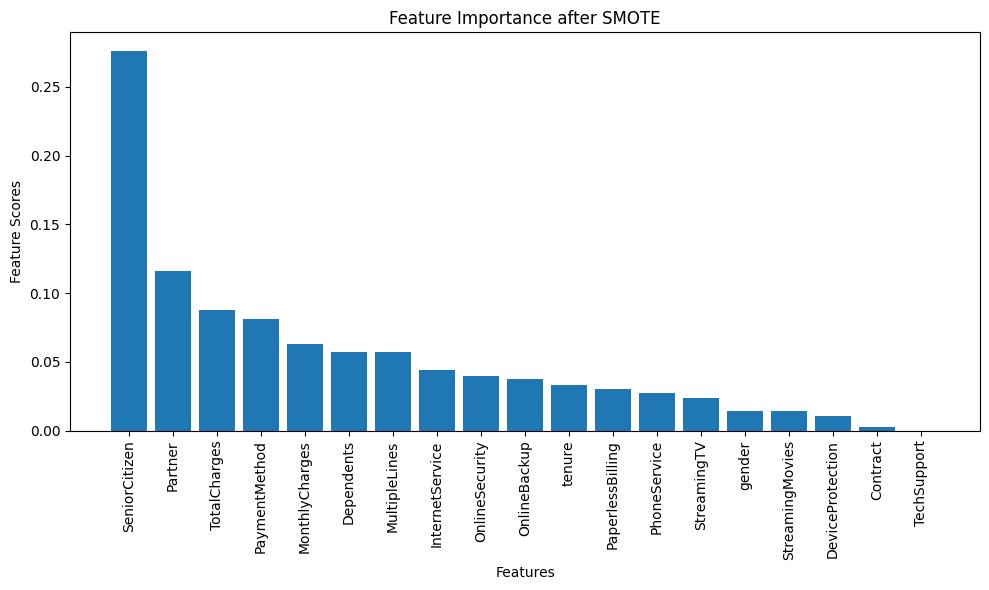

In [53]:
# Access the SelectKBest transformer from the pipeline
select_k_best = all_smote_pipelines[model_name]['feature_selection']

# Get the feature scores from SelectKBest
feature_scores = select_k_best.scores_

# Get the names of all features
all_feature_names = X_train.columns

# Create a dictionary to store feature scores and names
feature_importance = dict(zip(all_feature_names, feature_scores))

# Sort the dictionary by feature scores in descending order
sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Get the feature names and scores separately
sorted_feature_names, sorted_scores = zip(*sorted_feature_importance)

# Create the histogram
plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_scores)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Scores')
plt.title('Feature Importance after SMOTE')
plt.tight_layout()
plt.show()

### After balancing the data with SMOTE, there we no significant changes in the F1 scores for our models

## Hyperparameter tuning for Models

In [49]:
# Create a dictionary to store the hyperparameters for each model
hyperparameters = {}

# Perform hyperparameter tuning for each model
for model_name, final_pipeline in all_pipelines.items():
    if model_name == 'Logistic_regression':
        # Define the hyperparameters to tune for Logistic Regression
        param_grid = {
            'classifier__penalty': ['l2', None],
            'classifier__C': [0.1, 1, 10]
        }
    elif model_name == 'Decision_tree':
        # Define the hyperparameters to tune for Decision Tree
        param_grid = {
            'classifier__max_depth': [None, 5, 10],
            'classifier__min_samples_split': [2, 5, 10]
        }
    elif model_name == 'Random_forest':
        # Define the hyperparameters to tune for Random Forest
        param_grid = {
            'classifier__n_estimators': [100, 200, 300],
            'classifier__max_depth': [None, 5, 10],
            'classifier__min_samples_split': [2, 5, 10]
        }
    elif model_name == 'Support_vector':
        # Define the hyperparameters to tune for Support Vector Machine
        param_grid = {
            'classifier__C': [0.1, 1, 10],
            'classifier__kernel': ['linear', 'rbf']
        }
    elif model_name == 'KNN':
        # Define the hyperparameters to tune for K-Nearest Neighbors
        param_grid = {
            'classifier__n_neighbors': [3, 5, 7]
        }
    elif model_name == 'Gradient_boost':
        # Define the hyperparameters to tune for Gradient Boosting
        param_grid = {
            'classifier__learning_rate': [0.1, 0.01],
            'classifier__n_estimators': [100, 200, 300],
            'classifier__max_depth': [3, 5, 10]
        }
    elif model_name == 'XGBoost':
        # Define the hyperparameters to tune for XGBoost
        param_grid = {
            'classifier__learning_rate': [0.1, 0.01],
            'classifier__n_estimators': [100, 200, 300],
            'classifier__max_depth': [3, 5, 10]
        }

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(estimator=final_pipeline, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train_encoded)

    # Store the best hyperparameters in the dictionary
    hyperparameters[model_name] = grid_search.best_params_

    # Fit the model with the best hyperparameters
    best_pipeline = grid_search.best_estimator_
    best_pipeline.fit(X_train, y_train_encoded)

    # Get the evaluation metrics for the best model
    y_pred = best_pipeline.predict(X_test)
    metrics = classification_report(y_test_encoded, y_pred, output_dict=True)

    # Print the best hyperparameters and evaluation metrics for each model
    print(f"Model: {model_name}")
    print("Best Hyperparameters:", hyperparameters[model_name])
    print("Accuracy:", metrics['accuracy'])
    print("Precision:", metrics['weighted avg']['precision'])
    print("Recall:", metrics['weighted avg']['recall'])
    print("F1-score:", metrics['weighted avg']['f1-score'])
    print("----------------------------------------------")

c:\Users\user\Desktop\ML-Project-to-predict-Customer-Churn\myvenv\lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\user\Desktop\ML-Project-to-predict-Customer-Churn\myvenv\lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\user\Desktop\ML-Project-to-predict-Customer-Churn\myvenv\lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\user\Desktop\ML-Project-to-predict-Customer-Churn\myvenv\lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\user\Desktop\ML-Project-to-predict-Customer-Churn\myvenv\lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarn

Model: Logistic_regression
Best Hyperparameters: {'classifier__C': 0.1, 'classifier__penalty': None}
Accuracy: 0.8056840713813616
Precision: 0.7988763179389562
Recall: 0.8056840713813616
F1-score: 0.8011675635993621
----------------------------------------------
Model: Decision_tree
Best Hyperparameters: {'classifier__max_depth': 5, 'classifier__min_samples_split': 2}
Accuracy: 0.7812293456708526
Precision: 0.779688317408171
Recall: 0.7812293456708526
F1-score: 0.7804287704179241
----------------------------------------------
Model: Random_forest
Best Hyperparameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 100}
Accuracy: 0.8010575016523463
Precision: 0.7898674980797546
Recall: 0.8010575016523463
F1-score: 0.791046812054084
----------------------------------------------
Model: Support_vector
Best Hyperparameters: {'classifier__C': 0.1, 'classifier__kernel': 'linear'}
Accuracy: 0.8089887640449438
Precision: 0.8011290050563389
Reca

ValueError: Invalid parameter 'learning_rate' for estimator GaussianNB(). Valid parameters are: ['priors', 'var_smoothing'].